In [3]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.colors import LogNorm
import seaborn as sns
import math
from scipy import stats
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Data Loading

In [5]:
#Get dataset
datafile = pd.read_csv('CovidSurveillance.csv')
#Print data
datafile

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/14,2021/02/08,NaN,2020/11/14,Probable Case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",Unknown,No,No,No
1,2020/07/15,2020/08/20,NaN,2020/07/15,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",No,No,No,No
2,2020/06/23,2020/09/01,NaN,2020/06/23,Probable Case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",No,No,No,No
3,2020/05/09,2020/08/13,NaN,2020/05/09,Probable Case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",No,No,No,No
4,2020/10/20,2020/10/30,NaN,2020/10/20,Probable Case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
901594,2021/01/14,2021/01/14,2021/02/01,2021/01/14,Laboratory-confirmed case,Female,20 - 29 Years,Hispanic/Latino,No,No,No,No
901595,2021/01/30,2021/03/02,2021/02/01,2021/01/30,Laboratory-confirmed case,Female,20 - 29 Years,Hispanic/Latino,No,No,No,No
901596,2021/01/29,2021/01/29,2021/02/01,2021/01/29,Laboratory-confirmed case,Female,20 - 29 Years,Hispanic/Latino,No,No,No,Yes
901597,2021/01/31,2021/01/31,2021/02/01,2021/01/31,Laboratory-confirmed case,Female,20 - 29 Years,Hispanic/Latino,No,No,No,No


In [6]:
#Drop unnecessary columns

df = datafile.drop(columns=['cdc_report_dt', 'pos_spec_dt', 'onset_dt', 'current_status'])
#Print the head
df.head()

,cdc_case_earliest_dt,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/14,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",Unknown,No,No,No
1,2020/07/15,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",No,No,No,No
2,2020/06/23,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",No,No,No,No
3,2020/05/09,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",No,No,No,No
4,2020/10/20,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",No,No,No,No


# Handle Missing Data

In [7]:
#Get columns, total values, # of unique elements and top values

df.describe().T

,count,unique,top,freq
cdc_case_earliest_dt,901599,471,2020/11/09,5865
sex,901599,2,Female,479010
age_group,901599,10,20 - 29 Years,149512
race_ethnicity_combined,901599,9,"White, Non-Hispanic",470395
hosp_yn,901599,4,No,746708
icu_yn,901599,2,No,856413
death_yn,901599,2,No,853653
medcond_yn,901599,2,No,520132


In [8]:
#To find missing values such as missing and unknown values

for i in df:
    result = df[i].unique()
    if i == 'cdc_case_earliest_dt':
        continue
    else:
        print(i)
        print(result)

sex
['Female' 'Male']
age_group
['0 - 9 Years' '10 - 19 Years' '20 - 29 Years' '30 - 39 Years'
 '40 - 49 Years' '50 - 59 Years' '60 - 69 Years' '70 - 79 Years'
 '80+ Years' 'Missing']
race_ethnicity_combined
['American Indian/Alaska Native, Non-Hispanic' 'Unknown' 'Hispanic/Latino'
 'Black, Non-Hispanic' 'Asian, Non-Hispanic' 'Missing'
 'Multiple/Other, Non-Hispanic'
 'Native Hawaiian/Other Pacific Islander, Non-Hispanic'
 'White, Non-Hispanic']
hosp_yn
['Unknown' 'No' 'Missing' 'Yes']
icu_yn
['No' 'Yes']
death_yn
['No' 'Yes']
medcond_yn
['No' 'Yes']


In [9]:
#Missing and unknown values list
naVal = df[(df['race_ethnicity_combined']=='Missing') | (df['race_ethnicity_combined']=='Unknown') | (df['age_group']=='Missing') | (df['hosp_yn']=='Missing') | (df['hosp_yn']=='Unknown')]

In [11]:
print("Ratio of the the rows with missing/unknown values to the others: %" + str(naVal.size*100 / df.size)[0:7])

Ratio of the the rows with missing/unknown values to the others: %18.0478


Rows which contains at least 1 naVal is approximately 18% of the total


In [13]:
#Remove rows that contains missing and unknown values

second_df = df.drop(naVal.index, axis=0).reset_index(drop=True)

In [14]:
#Check the dataset for missing and unknown values
  
for i in second_df:
    result = second_df[i].unique()
    if i == 'cdc_case_earliest_dt':
        continue
    else:
        print(i)
        print(result)

sex
['Female' 'Male']
age_group
['0 - 9 Years' '10 - 19 Years' '20 - 29 Years' '30 - 39 Years'
 '40 - 49 Years' '50 - 59 Years' '60 - 69 Years' '70 - 79 Years'
 '80+ Years']
race_ethnicity_combined
['American Indian/Alaska Native, Non-Hispanic' 'Hispanic/Latino'
 'Black, Non-Hispanic' 'Asian, Non-Hispanic'
 'Multiple/Other, Non-Hispanic'
 'Native Hawaiian/Other Pacific Islander, Non-Hispanic'
 'White, Non-Hispanic']
hosp_yn
['No' 'Yes']
icu_yn
['No' 'Yes']
death_yn
['No' 'Yes']
medcond_yn
['No' 'Yes']


# Data Exploration

In [15]:
#Date values in the dataset converted to datetime

third_df = second_df
third_df['date'] = pd.to_datetime(third_df['cdc_case_earliest_dt'],format='%Y/%m/%d')
third_df = third_df.drop(columns='cdc_case_earliest_dt')

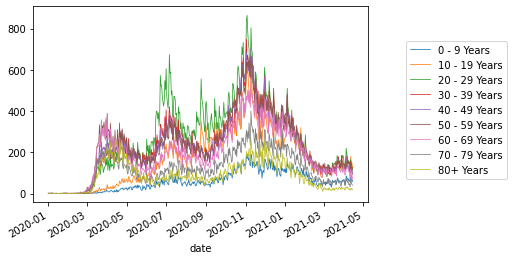

In [16]:
# Group the age_group in terms of date and plot

p_df = third_df.groupby(['age_group','date'])
key_values = p_df.groups.keys()
temp = p_df.size().reset_index().rename(columns={0:'count'}).groupby('age_group')
fig, ax = plt.subplots()

for key, grp in temp:
    ax = grp.plot(ax=ax, kind='line', x='date', y='count', label=key,linewidth=0.75)

plt.legend(bbox_to_anchor=(1.1, 0.85))
plt.show()

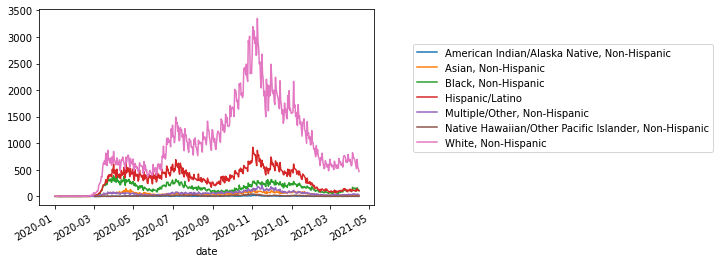

In [17]:
#Group the rate_ethnicity in terms of date and plot

p_df = third_df.groupby(['race_ethnicity_combined','date'])
key_values = p_df.groups.keys()
temp = p_df.size().reset_index().rename(columns={0:'count'}).groupby('race_ethnicity_combined')
fig, ax = plt.subplots()

for key, grp in temp:
    ax = grp.plot(ax=ax, kind='line', x='date', y='count', label=key)

plt.legend(bbox_to_anchor=(1.1, 0.85))
plt.show()

# Relationship Graphs

<AxesSubplot:ylabel='age_group'>

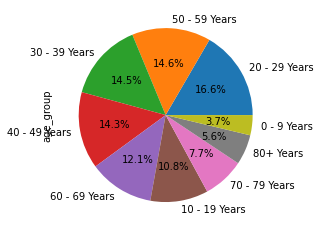

In [18]:
#To show percentage of the covid depend on ages

third_df['age_group'].value_counts().plot.pie(autopct='%1.1f%%')

In [20]:
#Change the name of race_ethnicities on the graph for x axis

converted_vals= {'American Indian/Alaska Native, Non-Hispanic':'Native', 'Hispanic/Latino':'Hispanic',
       'Black, Non-Hispanic':'Black', 'Asian, Non-Hispanic':'Asian',
       'Multiple/Other, Non-Hispanic':'Other',
       'Native Hawaiian/Other Pacific Islander, Non-Hispanic':'Pacific Islander',
       'White, Non-Hispanic':'White'}

df_cpy = third_df.copy()
df_cpy['race_ethnicity_combined'] = df_cpy['race_ethnicity_combined'].map(converted_vals)

<BarContainer object of 7 artists>

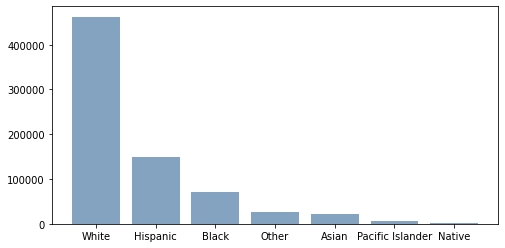

In [21]:
figure(figsize=(8, 4))
df_bar1 = df_cpy['race_ethnicity_combined'].value_counts().reset_index()
 
plt.bar(df_bar1['index'],df_bar1['race_ethnicity_combined'], color=(0.2, 0.4, 0.6, 0.6))

<AxesSubplot:ylabel='death_yn'>

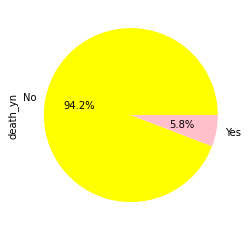

In [22]:
#Shows the percentage of death

colors = ["yellow", "pink", "purple", "blue"]
third_df['death_yn'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors)

<AxesSubplot:ylabel='sex'>

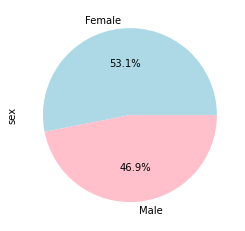

In [23]:
#Shows the percentage of sex

colors = ["lightblue", "pink", "purple", "blue"]
third_df['sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors)

<BarContainer object of 2 artists>

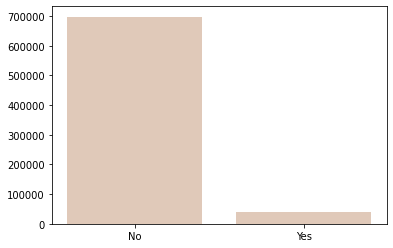

In [24]:
#Shows the case report

df_bar2 = df_cpy['icu_yn'].value_counts().reset_index()
plt.bar(df_bar2['index'],df_bar2['icu_yn'], color =(0.6, 0.3, 0.1, 0.3))

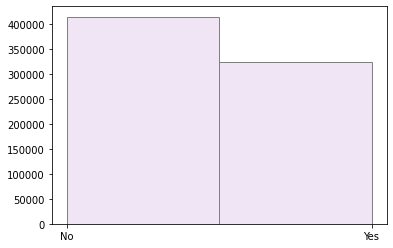

In [25]:
#Shows the medical condition

plt.hist(third_df['medcond_yn'],bins=2,edgecolor='gray', color =(0.7, 0.5, 0.8, 0.2));

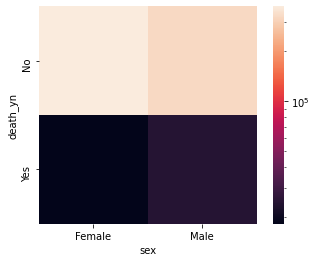

In [26]:
#Shows the heatmap between death and sex

df_heat = third_df.groupby(['death_yn','sex']).size().unstack().fillna(1)
log_norm = LogNorm(vmin=df_heat.min().min(), vmax=df_heat.max().max())
ticks = [math.pow(10, i) for i in range(math.floor(math.log10(df_heat.min().min())), 1+math.ceil(math.log10(df_heat.max().max())))]

ax = sns.heatmap(df_heat, square=True,norm=log_norm,cbar_kws={"ticks": ticks})
plt.show()

<AxesSubplot:ylabel='None'>

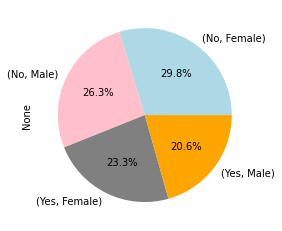

In [27]:
#Shows the relation between medical condition and sex

colors = ["lightblue", "pink", "gray", "orange", "blue"]
third_df[['medcond_yn','sex']].value_counts().plot.pie(autopct='%1.1f%%', colors=colors)

<AxesSubplot:xlabel='count', ylabel='death_yn'>

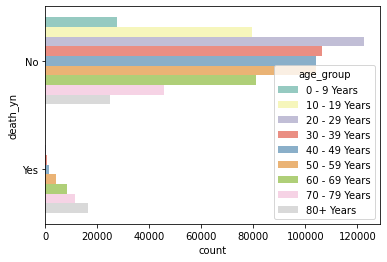

In [28]:
#Shows the relation between death and age group

sns.countplot(y="death_yn",hue ='age_group',data=third_df, palette="Set3")

<AxesSubplot:xlabel='count', ylabel='death_yn'>

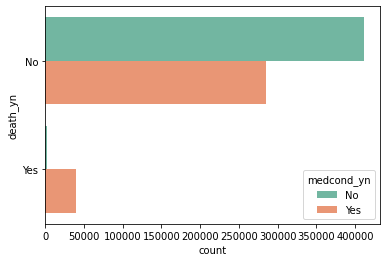

In [29]:
#Shows the relationship between death and medical condition

sns.countplot(y="death_yn",hue ='medcond_yn',data=third_df, palette="Set2")

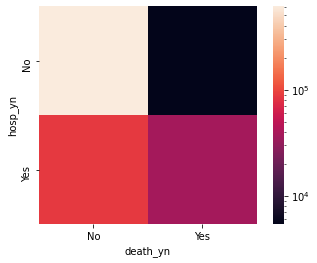

In [30]:
#Shows the relation between hospitalization status and death

df_heat = third_df.groupby(['hosp_yn','death_yn']).size().unstack().fillna(1)
log_norm = LogNorm(vmin=df_heat.min().min(), vmax=df_heat.max().max())
ticks = [math.pow(10, i) for i in range(math.floor(math.log10(df_heat.min().min())), 1+math.ceil(math.log10(df_heat.max().max())))]

ax = sns.heatmap(df_heat, square=True,norm=log_norm,cbar_kws={"ticks": ticks})
plt.show()

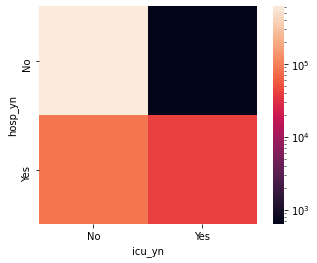

In [31]:
#Shows the relation between hospitalization status and intensive care unit

df_heat = third_df.groupby(['hosp_yn','icu_yn']).size().unstack().fillna(1)
log_norm = LogNorm(vmin=df_heat.min().min(), vmax=df_heat.max().max())
ticks = [math.pow(10, i) for i in range(math.floor(math.log10(df_heat.min().min())), 1+math.ceil(math.log10(df_heat.max().max())))]

ax = sns.heatmap(df_heat, square=True,norm=log_norm,cbar_kws={"ticks": ticks})
plt.show()

# Tests of Hypothesis 

If p <0.05, then the selected values means that refuse no effect. In this section both of them refused so it is has effect on it. This is an interesting result

In [32]:
convert = {'No':0, 'Yes':1}
df_hypt = third_df[['date','race_ethnicity_combined','death_yn']].copy()
df_hypt['death_yn'] = df_hypt['death_yn'].map(convert)
df_hypt1 = df_hypt[df_hypt['race_ethnicity_combined']=='Black, Non-Hispanic'].drop(columns='race_ethnicity_combined').groupby('date').mean()
df_hypt2 = df_hypt[df_hypt['race_ethnicity_combined']!='Black, Non-Hispanic'].drop(columns='race_ethnicity_combined').groupby('date').mean()
p = stats.ttest_ind(df_hypt1,df_hypt2,equal_var=False).pvalue
print('p value = ' + str(p[0]))

p value = 2.8504861704553004e-08


In [37]:
#Assume that sex has no effect on the chance of survival

convert = {'No':0, 'Yes':1}
df_hypt = third_df[['date','sex','death_yn']].copy()
df_hypt['death_yn'] = df_hypt['death_yn'].map(convert)
df_hypt1 = df_hypt[df_hypt['sex']=='Female'].drop(columns='sex').groupby('date').mean()
df_hypt2 = df_hypt[df_hypt['sex']=='Male'].drop(columns='sex').groupby('date').mean()
p = stats.ttest_ind(df_hypt1,df_hypt2,equal_var=False).pvalue
print('p value = ' + str(p[0]) + "\n")

print("Mean Values of Death Ratio:")
print('Men (monthly):   ' + str(df_hypt2.mean().death_yn))
print('Women(monthly): ' + str(df_hypt1.mean().death_yn))

# With ttest, obtain that p < 0.5 threshold, then %95 it can be said that 
#sex determines survival rate of paatient.


p value = 0.0030387521113432133

Mean Values of Death Ratio:
Men (monthly):   0.09513818795753115
Women(monthly): 0.07164078228689721


# Predict a Case's Fatality with Decision Tree

In [38]:
#All columns datatype converted to int for decision tree

start = third_df['date'].min()
def time_diff(current):
    return current.day-start.day
convertion_sex = {'Female':0, 'Male':1}
convertion_bool = {'No':0, 'Yes':1}
convertion_years = {'0 - 9 Years':0, '10 - 19 Years':1, '20 - 29 Years':2, '30 - 39 Years':3,
       '40 - 49 Years':4, '50 - 59 Years':5, '60 - 69 Years':6, '70 - 79 Years':7,
       '80+ Years':8}
convertion_race = {'American Indian/Alaska Native, Non-Hispanic':0, 'Hispanic/Latino':1,
       'Black, Non-Hispanic':2, 'Asian, Non-Hispanic':3, 'Multiple/Other, Non-Hispanic':4,
       'Native Hawaiian/Other Pacific Islander, Non-Hispanic':5,'White, Non-Hispanic':6}

In [39]:
#Converted values mapping to columns

df_tree = third_df.copy()
df_tree['sex']=df_tree['sex'].map(convertion_sex)
df_tree['hosp_yn']=df_tree['hosp_yn'].map(convertion_bool)
df_tree['icu_yn']=df_tree['icu_yn'].map(convertion_bool)
df_tree['death_yn']=df_tree['death_yn'].map(convertion_bool)
df_tree['medcond_yn']=df_tree['medcond_yn'].map(convertion_bool)
df_tree['age_group']=df_tree['age_group'].map(convertion_years)
df_tree['race_ethnicity_combined']=df_tree['race_ethnicity_combined'].map(convertion_race)
df_tree['time_passed'] = df_tree['date'].apply(time_diff)
df_tree = df_tree.drop(columns = 'date')

In [40]:
#If if patient has medical conditions before

X = df_tree.drop(columns='medcond_yn')
y = df_tree['medcond_yn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7223732831346301

In [41]:
#Train and test sets are seperated and 
#develop decision tree with a %95 accuracy on test set.

X = df_tree.drop(columns='death_yn')
y = df_tree['death_yn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9529346145486013

#  Predict Deaths for a Day with Decision Tree

In [42]:
df_tree2 = df_tree.groupby(['time_passed','age_group','sex','race_ethnicity_combined']).sum().reset_index()

In [43]:
#Decision tree implementation to find a demogrophic's daily sum of fatalities.
#However the result is not satisfying. 
#For more suitable model, regression model can be used.

X = df_tree2.drop(columns='death_yn')
y = df_tree2['death_yn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.4251968503937008